In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyextremes import EVA

print("Todos los paquetes importados correctamente")


Todos los paquetes importados correctamente


In [2]:
station = 150
# We create some random continuous time series with some extremes
flowdata = pd.read_csv(f"../../../Status_Outlook_Bulletin/stations/data/{station}.csv",parse_dates=['Fecha'],index_col="Fecha",dayfirst=True,na_values="NA")
# Convertir el índice a datetime por si acaso
flowdata.index = pd.to_datetime(flowdata.index, dayfirst=True)
diff = pd.date_range(start = flowdata.index[0].strftime('%Y-%m-%d'), end = flowdata.index[-1].strftime('%Y-%m-%d'),freq='D')
# Re-index the dataframe based on the missind date variable
flowdata = flowdata.reindex(diff,fill_value=None)
# Set index Fecha
flowdata.index.name = 'Fecha'
flowdata = flowdata.rename_axis("date")
# Change columns names
flowdata.columns = ['flow']

#month and year column
flowdata['month'] = flowdata.index.month
flowdata['year'] = flowdata.index.year
flowdata = flowdata.reset_index()

#check whether or not there is enough data? 
print(station)
print(f"There are {flowdata['year'].max() - flowdata['year'].min()} years of data in this file.")
print(f"There are {sum(flowdata['flow'].isnull())} missing data points, which is {np.round(sum(flowdata['flow'].isnull())/len(flowdata) * 100,2)}% of the total data")

150
There are 44 years of data in this file.
There are 442 missing data points, which is 2.7% of the total data


In [3]:
flowdata.set_index('date', inplace=True)
# Create a time series (removing missing values in 'flow' column)
flowdata_ts = flowdata['flow'].dropna()
# Display the result
print(flowdata_ts)

date
1980-01-01    6.784
1980-01-02    6.645
1980-01-03    6.161
1980-01-04    5.727
1980-01-05    5.616
              ...  
2024-11-02    4.656
2024-11-03    2.784
2024-11-04    2.068
2024-11-05    1.748
2024-11-06    1.483
Name: flow, Length: 15940, dtype: float64


In [4]:
from pyextremes import get_extremes
extremes = get_extremes(
    ts=flowdata_ts,
    method="BM",
    block_size="365.2425D",
)
extremes.sort_values(ascending=False).head(6)

date
2016-04-21    3565.115
2010-02-10    2874.148
1986-08-11    2744.564
2015-08-17    2743.813
2019-06-19    2725.105
2002-03-20    2621.179
Name: flow, dtype: float64

In [5]:
model = EVA(flowdata_ts)

In [6]:
model.get_extremes(method="BM", block_size="365.2425D")

(<Figure size 768x480 with 1 Axes>,
 <AxesSubplot: xlabel='date', ylabel='flow'>)

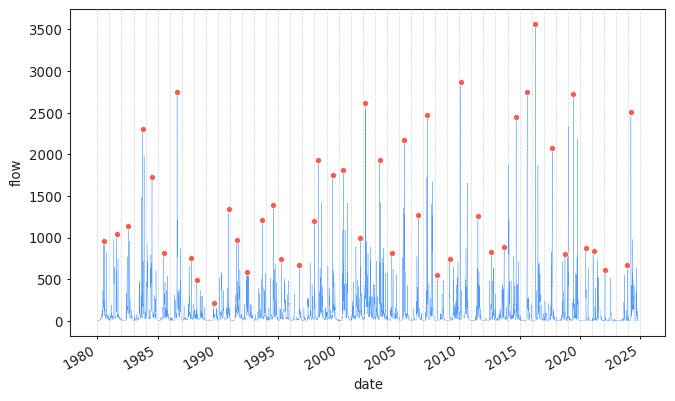

In [7]:
model.plot_extremes()

In [11]:
model.fit_model()
summary = model.get_summary(
    return_period=[2, 5, 10, 20, 25, 50, 100, 250, 500, 1000],
    alpha=0.95,
    n_samples=1000,
)
print(summary)

               return value     lower ci     upper ci
return period                                        
2.0             1296.806304  1071.973742  1520.379694
5.0             1991.592501  1615.708252  2338.286814
10.0            2451.601419  1957.393855  2898.792682
20.0            2892.853018  2294.708717  3435.711714
25.0            3032.823907  2400.191815  3600.612094
50.0            3464.007951  2715.824966  4129.709570
100.0           3892.008199  3044.165062  4644.916359
250.0           4455.540491  3472.022564  5327.584504
500.0           4881.051436  3793.029769  5845.795471
1000.0          5306.254730  4113.466120  6358.443984


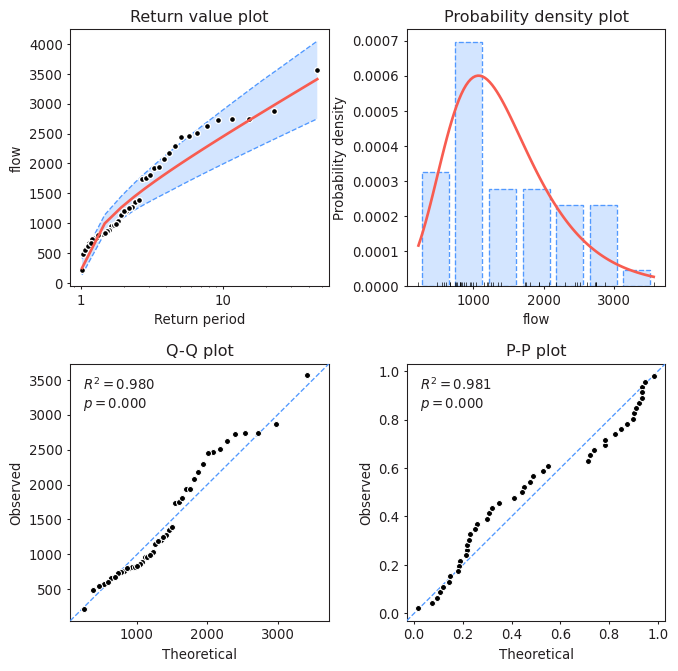

In [9]:
model.plot_diagnostic(alpha=0.95);
plt.show()

In [10]:
model

                           Univariate Extreme Value Analysis                            
                                      Source Data                                       
----------------------------------------------------------------------------------------
Data label:                          flow      Size:                              15,940
Start:                       January 1980      End:                        November 2024
                                     Extreme Values                                     
----------------------------------------------------------------------------------------
Count:                                 45      Extraction method:                     BM
Type:                                high      Block size:             365 days 05:49:12
                                         Model                                          
----------------------------------------------------------------------------------------
Model:               